<a href="https://colab.research.google.com/github/BrianGakungi/JOHN-NJAGI-CORE-WEEK-4-IP/blob/main/JOHN_NJAGI_IP_WEEK_4_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# importing the relevant libraries
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plot
import scipy.stats
import seaborn as sns

In [90]:
# loading our data and previewing it
df = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [91]:
# determining the no. of records in the data
df.shape

(16085, 13)

In [92]:
# checking if each column has the relevant data type
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [93]:
# changing the data type for the date column
df['date'] = df['date'].astype('datetime64[ns]')
 
# Check the format of 'Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

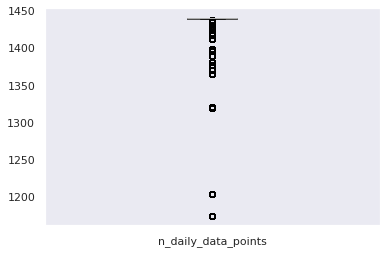

In [94]:
# Checking outliers for relevant columns
df.boxplot(column=["n_daily_data_points"], grid = False)


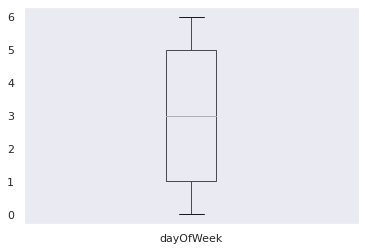

In [95]:
df.boxplot(column=["dayOfWeek"], grid = False)

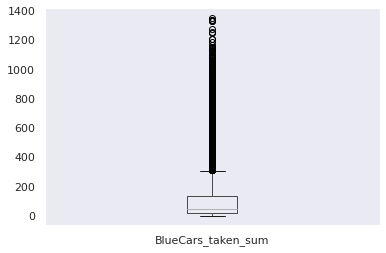

In [96]:
df.boxplot(column=["BlueCars_taken_sum"], grid = False)

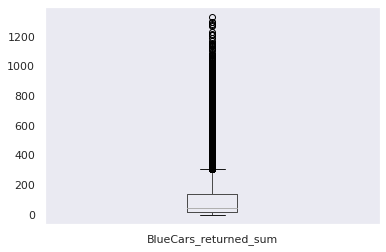

In [97]:
df.boxplot(column=["BlueCars_returned_sum"], grid = False)

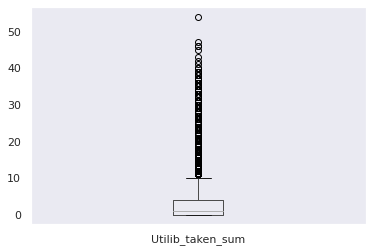

In [98]:
df.boxplot(column=["Utilib_taken_sum"], grid = False)

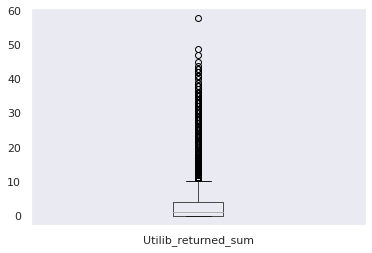

In [99]:
df.boxplot(column=["Utilib_returned_sum"], grid = False)

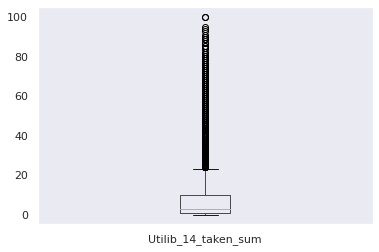

In [100]:
df.boxplot(column=["Utilib_14_taken_sum"], grid = False)

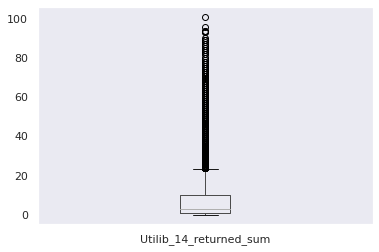

In [101]:
df.boxplot(column=["Utilib_14_returned_sum"], grid = False)

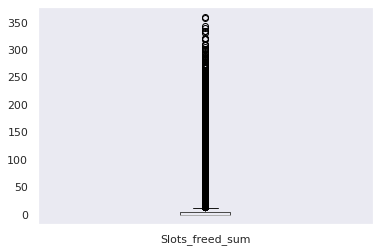

In [102]:
df.boxplot(column=["Slots_freed_sum"], grid = False)

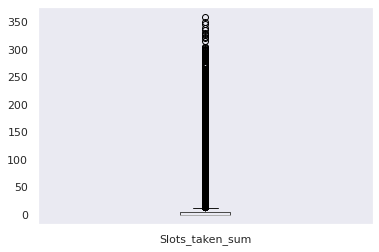

In [103]:
df.boxplot(column=["Slots_taken_sum"], grid = False)

In [104]:
# no need to drop the outliers since the data points comprise a lot of them meaning 
# they must be part of the data and need to be further looked into while performing our analysis

In [105]:
# identifing missing values if any
df.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [144]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [107]:
# pearson correlation coefficient between the columns
df.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


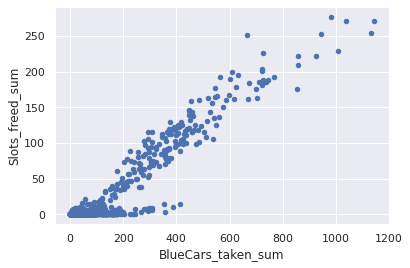

In [108]:
# showing the relationship between bluecars taken and slots freed
df.sample(1000).plot.scatter(x='BlueCars_taken_sum', y='Slots_freed_sum')
# shows a positive relationship between the 2 columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


AxesSubplot(0.125,0.125;0.775x0.755)


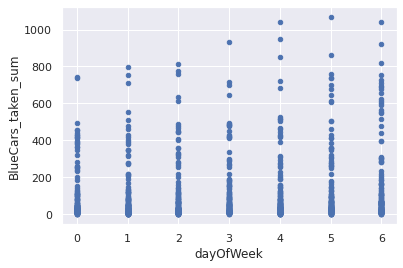

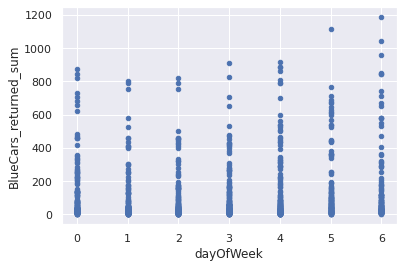

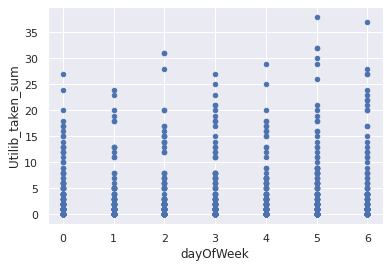

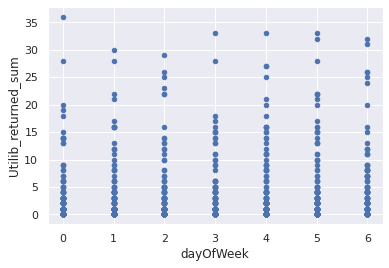

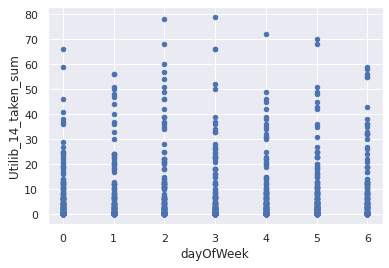

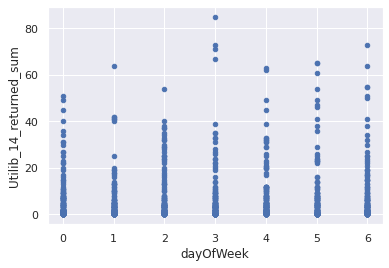

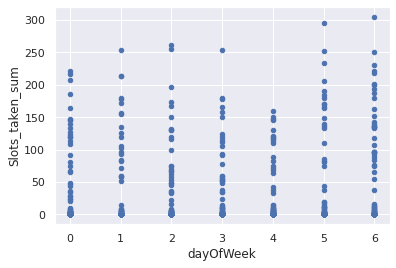

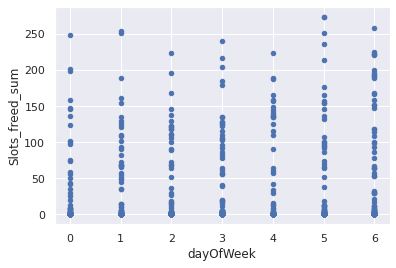

In [109]:
# showing the relationship between day of the week and respective columns
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='BlueCars_taken_sum'))
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='BlueCars_returned_sum'))
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='Utilib_taken_sum'))
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='Utilib_returned_sum'))
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='Utilib_14_taken_sum'))
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='Utilib_14_returned_sum'))
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='Slots_taken_sum'))
print(df.sample(1000).plot.scatter(x='dayOfWeek', y='Slots_freed_sum'))
# no correlation between day of the week and the respective columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

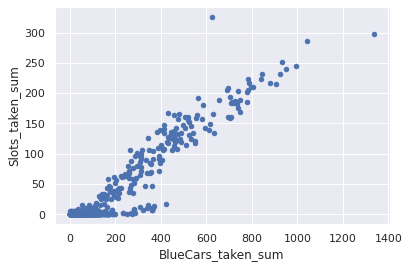

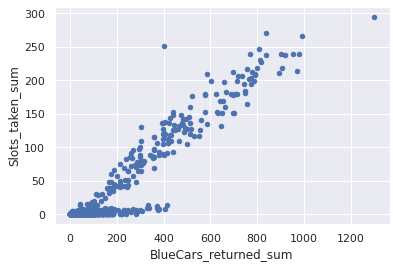

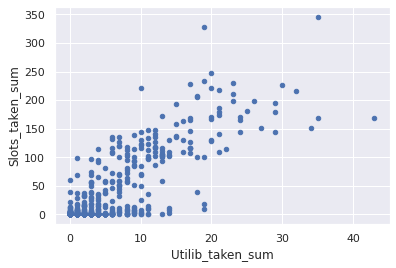

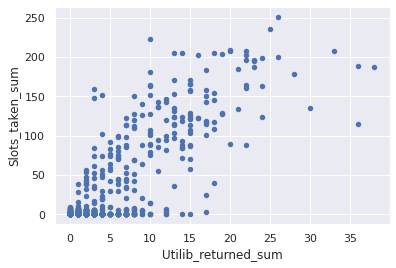

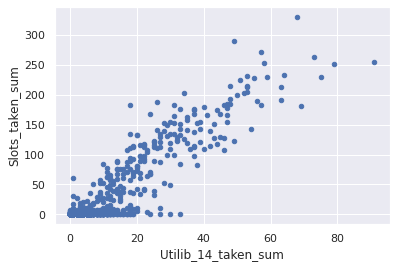

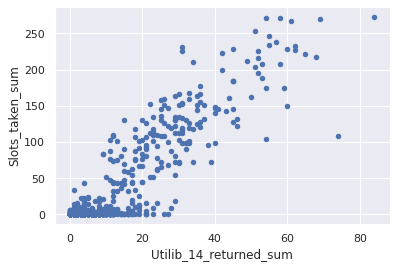

In [110]:
# showing relationship between slots taken and respective columns
df.sample(1000).plot.scatter(x='BlueCars_taken_sum', y='Slots_taken_sum')
df.sample(1000).plot.scatter(x='BlueCars_returned_sum', y='Slots_taken_sum')
df.sample(1000).plot.scatter(x='Utilib_taken_sum', y='Slots_taken_sum')
df.sample(1000).plot.scatter(x='Utilib_returned_sum', y='Slots_taken_sum')
df.sample(1000).plot.scatter(x='Utilib_14_taken_sum', y='Slots_taken_sum')
df.sample(1000).plot.scatter(x='Utilib_14_returned_sum', y='Slots_taken_sum')

# positive correlation between the relevant columns and slots taken with the exemption of utilib taken and returned which have a weaker
# correlation with slots taken compared to the other columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

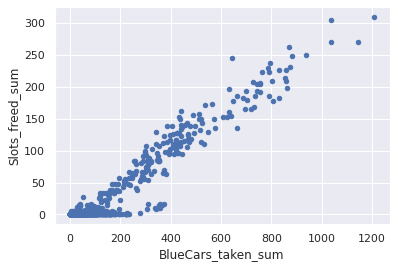

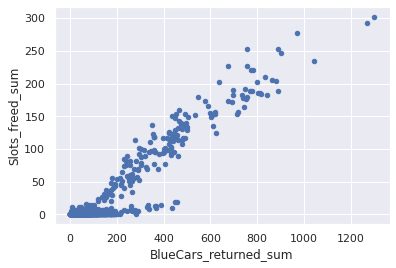

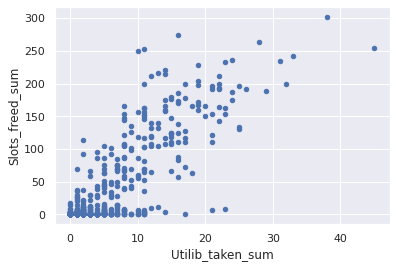

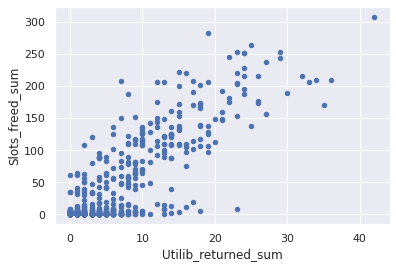

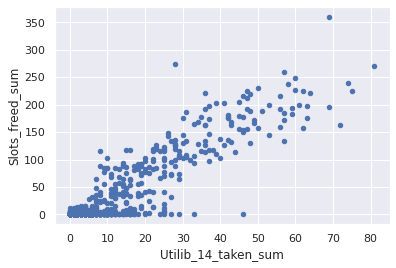

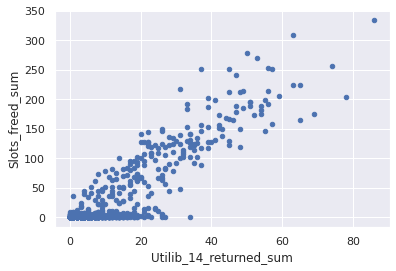

In [111]:
# showing relationship between slots freed and respective columns
df.sample(1000).plot.scatter(x='BlueCars_taken_sum', y='Slots_freed_sum')
df.sample(1000).plot.scatter(x='BlueCars_returned_sum', y='Slots_freed_sum')
df.sample(1000).plot.scatter(x='Utilib_taken_sum', y='Slots_freed_sum')
df.sample(1000).plot.scatter(x='Utilib_returned_sum', y='Slots_freed_sum')
df.sample(1000).plot.scatter(x='Utilib_14_taken_sum', y='Slots_freed_sum')
df.sample(1000).plot.scatter(x='Utilib_14_returned_sum', y='Slots_freed_sum')
# positive correlation between the relevant columns and slots taken with the exemption of utilib taken and returned which have a weaker
# correlation with slots freed compared to the other columns

In [112]:
# Counting the data points for the respective days of the week
pd.crosstab(index=df['dayOfWeek'], columns='count') 

col_0,count
dayOfWeek,
0,2374
1,2363
2,2268
3,2268
4,2271
5,2267
6,2274


In [113]:
# Set the styles of all graphs to Seaborn one
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [114]:
# We'll use cluster sampling and cluster our data based on the day of the week
x = df.iloc[:, 3:4]
x

,dayOfWeek
0,0
1,1
2,2
3,3
4,4
...,...
16080,4
16081,5
16082,6
16083,0


In [115]:
# Creating an object from the KMeans method we imported from sklearn library
# we create 7 clusters representing each day of the week
kmeans = KMeans(7)

# calling the fit method on the object we created and then using our input as x.
kmeans.fit(x)

KMeans(n_clusters=7)

In [116]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters


array([2, 5, 3, ..., 1, 2, 5], dtype=int32)

In [117]:
# Create a copy of the data
data_with_clusters = df.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Cluster
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,2
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,5
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,3
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,0
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,4


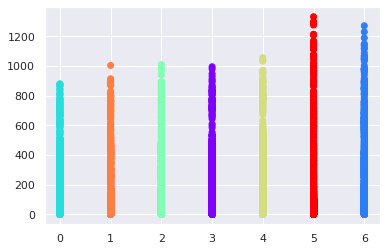

In [118]:
# Plot the data to show clusters for blue cars returned
plot.scatter(data_with_clusters['dayOfWeek'],data_with_clusters['BlueCars_returned_sum'],c=data_with_clusters['Cluster'],cmap='rainbow')
plot.show()

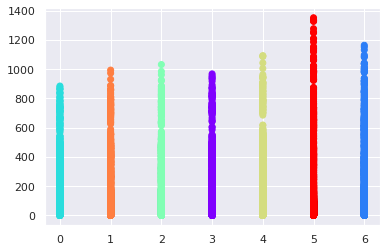

In [119]:
# Plot the data to show clusters for the blue cars taken
plot.scatter(data_with_clusters['dayOfWeek'],data_with_clusters['BlueCars_taken_sum'],c=data_with_clusters['Cluster'],cmap='rainbow')
plot.show()

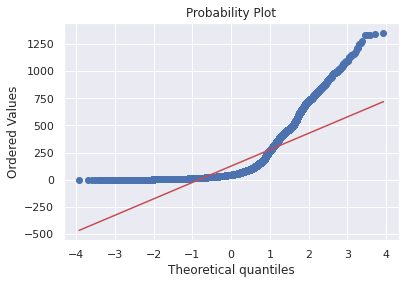

In [120]:
# testing to see whether the blue cars taken reflects a normal distribution using a Q-Q plot
import pylab   
x1 = df["BlueCars_taken_sum"]
stats.probplot(x1, dist="norm", plot=pylab)
pylab.show()
# since the data does not follow a normal distribution we have to use the z test instead of t test

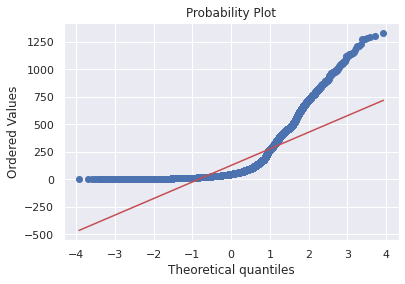

In [121]:
# testing to see if bluecars returned follow a normal distribution using a Q-Q plot
import pylab
x2 = df["BlueCars_returned_sum"]   
stats.probplot(x2, dist="norm", plot=pylab)
pylab.show()
# since the data does not follow a normal distribution we have to use the z test instead of t test

**HYPOTHESIS 1**

In [122]:
# test whether the mean no. of cars returned on weekend is different from the mean 
# no. of cars returned on weekday
# null hypothesis = mean no. of cars returned on weekend and weekday is the same
# alternative hypothesis = mean no. of cars returned on weekend and weekday is different
# calculate the mean for both weekday and weekend return
return_weekend = df["day_type"] == "weekend"
mean_for_weekend_return = df.loc[return_weekend, "BlueCars_returned_sum"].mean()
return_weekday = df["day_type"] == "weekday"
mean_for_weekday_return = df.loc[return_weekday, "BlueCars_returned_sum"].mean()
print(mean_for_weekend_return)
print(mean_for_weekday_return)

152.02928870292888
115.63937976437977


In [123]:
# calculate the standard deviation for both weekday and weekend return
return_weekend = df["day_type"] == "weekend"
std_for_weekend_return = df.loc[return_weekend, "BlueCars_returned_sum"].std()
return_weekday = df["day_type"] == "weekday"
std_for_weekday_return = df.loc[return_weekday, "BlueCars_returned_sum"].std()
print(std_for_weekend_return)
print(std_for_weekday_return)

221.1403371197894
168.34475125432746


In [124]:
# setting the confidence level at 95%
# calculate the z statistic
z = (mean_for_weekday_return - mean_for_weekend_return) / (std_for_weekday_return / np.sqrt(len(x)) + std_for_weekend_return / np.sqrt(len(x)))
z

-11.849517488997979

In [125]:
p = scipy.stats.norm.sf(abs(z))*2
p
# since our p value is smaller than the significance level of 0.05 we can reject the null hypothesis and accept the alternative hypothesis.
# CONCLUSION:
# At a 5% level of significance, from the sample data, there is sufficient evidence to conclude that there is a difference between mean number of cars
# returned on weekdays and weekends

2.1643340823425844e-32

**HYPOTHESIS 2**

In [126]:
# test whether the mean no. of cars taken on weekend is different from the mean 
# no. of cars taken on weekday
# null hypothesis = mean no. of cars taken on weekend and weekday is the same
# alternative hypothesis = mean no. of cars taken on weekend is greater than that on the weekday
# calculate the mean for both weekday and weekend taken
taken_weekend = df["day_type"] == "weekend"
mean_for_weekend_taken = df.loc[taken_weekend, "BlueCars_taken_sum"].mean()
taken_weekday = df["day_type"] == "weekday"
mean_for_weekday_taken = df.loc[taken_weekday, "BlueCars_taken_sum"].mean()
print(mean_for_weekend_taken)
print(mean_for_weekday_taken)

151.09006826690157
116.0286729036729


In [127]:
# calculate the standard deviation for both weekday and weekend taken
taken_weekend = df["day_type"] == "weekend"
std_for_weekend_taken = df.loc[taken_weekend, "BlueCars_taken_sum"].std()
taken_weekday = df["day_type"] == "weekday"
std_for_weekday_taken = df.loc[taken_weekday, "BlueCars_taken_sum"].std()
print(std_for_weekend_taken)
print(std_for_weekday_taken)

218.5656415891513
169.62690469970084


In [128]:
# setting the confidence level at 95%
# calculate the z statistic
zstat = (mean_for_weekday_taken - mean_for_weekend_taken) / (std_for_weekday_taken / np.sqrt(len(x)) + std_for_weekend_taken / np.sqrt(len(x)))
zstat

-11.454932554001434

In [129]:
p = scipy.stats.norm.sf(abs(zstat))*2
p
# since our p value is smaller than the significance level of 0.05 we can reject the null hypothesis and accept the alternative hypothesis.
# CONCLUSION:
# At a 5% level of significance, from the sample data, there is sufficient evidence to conclude that there is a difference between mean number
# of cars taken on weekends and weekdays

2.221360995518375e-30

**Checking the interval estimate for blue cars returned**

In [130]:
sample_mean = df["BlueCars_returned_sum"].mean()
sample_size = df["BlueCars_returned_sum"].astype(str).map(len)
std_error = df["BlueCars_returned_sum"].std() / np.sqrt(16085)
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)
# We can be 95% certain that the population mean interval estimate for blue cars returned is between 123.046 and 128.779

(123.04599509933146, 128.77943231751652)

**Checking the interval estimate for blue cars taken**

In [131]:
sample_mean = df["BlueCars_taken_sum"].mean()
sample_size = df["BlueCars_taken_sum"].astype(str).map(len)
std_error = df["BlueCars_taken_sum"].std() / np.sqrt(16085)
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)
# We can be 95% certain that the population mean interval estimate for blue cars taken is between 123.061 and 128.793

(123.06139032759609, 128.7925108225438)

**HYPOTHESIS 3**

In [133]:
# test whether the mean no. of cars returned on Sunday is different from the mean 
# no. of cars returned on Saturday
# null hypothesis = mean no. of cars returned on Sunday and Saturday is the same
# alternative hypothesis = mean no. of cars returned on Sunday is different from that of Saturday
# calculate the mean for both weekday and weekend return
return_sunday = df["dayOfWeek"] == 6
mean_for_sunday_return = df.loc[return_sunday, "BlueCars_returned_sum"].mean()
return_sat = df["dayOfWeek"] == 5
mean_for_sat_return = df.loc[return_sat, "BlueCars_returned_sum"].mean()
print(mean_for_sunday_return)
print(mean_for_sat_return)

148.9863676341249
155.0816056462285


In [134]:
# calculate the standard deviation for both sunday and saturday return
return_sunday = df["dayOfWeek"] == 6
std_for_sunday_return = df.loc[return_sunday, "BlueCars_returned_sum"].std()
return_sat = df["dayOfWeek"] == 5
std_for_sat_return = df.loc[return_sat, "BlueCars_returned_sum"].std()
print(std_for_sunday_return)
print(std_for_sat_return)

213.9360465611456
228.1449461680628


In [135]:
# setting the confidence level at 95%
# calculate the z statistic
z = (mean_for_sunday_return - mean_for_sat_return) / (std_for_sunday_return / np.sqrt(len(x)) + std_for_sat_return / np.sqrt(len(x)))
z

-1.7486357729956936

In [143]:
p = scipy.stats.norm.sf(abs(z))*2
p
# since our p value is greater than the significance level of 0.05 we fail to reject the null hypothesis
# but we do not accept the null hypothesis either
# CONCLUSION:
# At a 5% level of significance, from the sample data, there is not sufficient evidence to conclude that there is a difference in mean
# number of cars returned on a sunday from those returned on a saturday

0.08035399857571252

**HYPOTHESIS 4**

In [137]:
# test whether the mean no. of cars taken on sunday is different from the mean 
# no. of cars taken on saturday
# null hypothesis = mean no. of cars taken on sunday and saturday is the same
# alternative hypothesis = mean no. of cars taken on sunday is different from that on saturday
# calculate the mean for both sunday and saturday taken
taken_sunday = df["dayOfWeek"] == 6
mean_for_sunday_taken = df.loc[taken_sunday, "BlueCars_taken_sum"].mean()
taken_sat = df["dayOfWeek"] == 5
mean_for_sat_taken = df.loc[taken_sat, "BlueCars_taken_sum"].mean()
print(mean_for_sunday_taken)
print(mean_for_sat_taken)

146.0712401055409
156.1243934715483


In [138]:
# calculate the standard deviation for both sunday and saturday taken
taken_sunday = df["dayOfWeek"] == 6
std_for_sunday_taken = df.loc[taken_sunday, "BlueCars_taken_sum"].std()
taken_sat = df["dayOfWeek"] == 5
std_for_sat_taken = df.loc[taken_sat, "BlueCars_taken_sum"].std()
print(std_for_sunday_taken)
print(std_for_sat_taken)

206.28949803411032
230.15882014258472


In [140]:
# setting the confidence level at 95%
# calculate the z statistic
zstat = (mean_for_sunday_taken - mean_for_sat_taken) / (std_for_sunday_taken / np.sqrt(len(x)) + std_for_sat_taken / np.sqrt(len(x)))
zstat

-2.9213259484032763

In [141]:
p = scipy.stats.norm.sf(abs(zstat))*2
p
# since our p value is smaller than the significance level of 0.05 we can reject the null hypothesis and accept the alternative hypothesis.
# CONCLUSION:
# At a 5% level of significance, from the sample data, there is sufficient evidence to conclude that there is a difference in mean number
# of cars taken on a sunday from that taken on a saturday

0.0034854496467142094

**GOOGLE DOCS HYPOTHESIS REPORT**
https://docs.google.com/document/d/16WqEEiBlsmpKS-pmyRnEULf_tBJxXlLZe3cBcyeVbnU/edit?usp=sharing 